In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import seaborn as sbn

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, St
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


df=pd.read_csv('data/trainimp.csv')
df_sub=pd.read_csv('data/testimp.csv')


X = df.drop("Survived", axis=1)
Y = df.Survived

sub = df_sub.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X= scaler.fit_transform(X)
sub = scaler.transform(sub)

X.shape

(891, 11)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
classifiers = {
    "NB": GaussianNB(),
    "SGD": SGDClassifier(),
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_val, y_val, cv=10,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results

C:\Users\mehmu\AppData\Local\Temp\ipykernel_25240\3545508119.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\mehmu\AppData\Local\Temp\ipykernel_25240\3545508119.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\mehmu\AppData\Local\Temp\ipykernel_25240\3545508119.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\mehmu\AppData\Local\Temp\ipykernel_25240\3545508119.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\mehmu\AppData\Local\Temp\ipykernel_25240\3545508119.py:22: FutureWarnin

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
3,LR,0.838235,0.803439,0.820837
7,MLP,0.832680,0.787085,0.809882
6,SVM,0.815359,0.755827,0.785593
0,NB,0.798693,0.751378,0.775035
2,KNN,0.793791,0.749972,0.771881
5,RF,0.798693,0.737916,0.768304
9,LGBM,0.771242,0.720913,0.746077
1,SGD,0.753922,0.689345,0.721633
8,XGB,0.749020,0.682882,0.715951
4,DT,0.715033,0.665731,0.690382


>lr 0.801 (0.039)
>knn 0.816 (0.044)
>cart 0.749 (0.060)
>svm 0.835 (0.041)
>bayes 0.804 (0.043)
>gb 0.829 (0.043)
>cat 0.825 (0.044)
>XGB 0.813 (0.045)
>lgbm 0.815 (0.049)


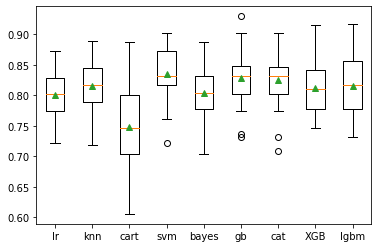

In [33]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['gb']= GradientBoostingClassifier()
	models['cat']= CatBoostClassifier()
	models['XGB']= XGBClassifier()
	models['lgbm']= LGBMClassifier()
	
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores



models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [83]:
from sklearn.ensemble import StackingClassifier
level0=list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
#level0.append(('cart', RandomForestClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
level0.append(('gb', GradientBoostingClassifier()))
#level0.append(('cat', CatBoostClassifier()))
level0.append(('MLP', MLPClassifier(max_iter=1000)))
level0.append(('lgbm', LGBMClassifier()))

model=StackingClassifier(estimators=level0, final_estimator=SVC(), cv=5)
clf=model.fit(X_train,y_train)

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mehmu\D

In [87]:
import warnings
warnings.filterwarnings("ignore")

lgbm = LGBMClassifier(random_state=0)
params = {
    "boosting_type": ["gbdt", "dart", "goss"],
    "learning_rate": [0.1, 0.05, 0.01],
    "n_estimators": [10, 50, 100, 300]
}
clf = GridSearchCV(lgbm, params, cv=10)
clf.fit(X_train, y_train)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'boosting_type': 'gbdt', 'learning_rate': 0.05, 'n_estimators': 50}


Accuracy: 0.8324022346368715
F1-Score: 0.7945205479452055


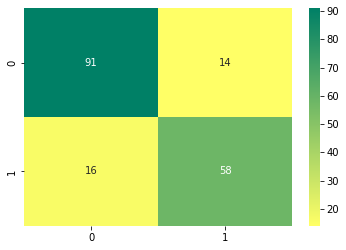

In [88]:
y_pred = clf.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"F1-Score: {f1_score(y_val, y_pred)}")
sbn.heatmap(confusion_matrix(y_val, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

In [89]:
y_pred = clf.predict(sub)

submission = pd.read_csv("data/gender_submission.csv")
submission["Survived"] = y_pred
submission.to_csv('submission.csv', index=False)

In [90]:
!kaggle competitions submit -c titanic -f submission.csv -m ""

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|██████████| 3.18k/3.18k [00:00<00:00, 28.4kB/s]
100%|██████████| 3.18k/3.18k [00:02<00:00, 1.50kB/s]
